In [3]:
install.packages("arules")
install.packages("readr")
install.packages("arulesViz")
install.packages("RColorBrewer")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘iterators’, ‘permute’, ‘zoo’, ‘tweenr’, ‘polyclip’, ‘RcppEigen’, ‘gridExtra’, ‘RcppArmadillo’, ‘ca’, ‘foreach’, ‘gclus’, ‘qap’, ‘registry’, ‘TSP’, ‘vegan’, ‘lmtest’, ‘ggforce’, ‘ggrepel’, ‘viridis’, ‘tidygraph’, ‘graphlayouts’, ‘crosstalk’, ‘lazyeval’, ‘seriation’, ‘vcd’, ‘igraph’, ‘scatterplot3d’, ‘ggraph’, ‘DT’, ‘plotly’, ‘visNetwork’


Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [4]:
library(arules)
library(readr)
library(RColorBrewer)

Loading required package: Matrix


Attaching package: ‘arules’


The following objects are masked from ‘package:base’:

    abbreviate, write




In [5]:
dataTrans <- read.transactions("basket_data.csv",
                           rm.duplicates = FALSE,
                           format = "basket",
                           sep=",",
                           cols=1)
inspect(dataTrans)

       items                                                                                                                                                                                                     transactionID
[1]    {original_language,                                                                                                                                                                                                    
        production_countries,                                                                                                                                                                                                 
        spoken_languages}                                                                                                                     genres                                                                          
[2]    {en,                                                                                                 

In [6]:
# Use apriori to get the RULES
FrulesK = arules::apriori(dataTrans, parameter = list(support=.15,
                                                 confidence=.15, minlen=2))

Apriori

Parameter specification:
 confidence minval smax arem  aval originalSupport maxtime support minlen
       0.15    0.1    1 none FALSE            TRUE       5    0.15      2
 maxlen target  ext
     10  rules TRUE

Algorithmic control:
 filter tree heap memopt load sort verbose
    0.1 TRUE TRUE  FALSE TRUE    2    TRUE

Absolute minimum support count: 1109 

set item appearances ...[0 item(s)] done [0.00s].
set transactions ...[1438 item(s), 7399 transaction(s)] done [0.01s].
sorting and recoding items ... [3 item(s)] done [0.00s].
creating transaction tree ... done [0.00s].
checking subsets of size 1 2 3 done [0.00s].
writing ... [9 rule(s)] done [0.00s].
creating S4 object  ... done [0.00s].


In [7]:
inspect(FrulesK)

    lhs                                    rhs                        support  
[1] {United States of America}          => {English}                  0.4430328
[2] {English}                           => {United States of America} 0.4430328
[3] {United States of America}          => {en}                       0.5848088
[4] {en}                                => {United States of America} 0.5848088
[5] {English}                           => {en}                       0.6076497
[6] {en}                                => {English}                  0.6076497
[7] {English, United States of America} => {en}                       0.4419516
[8] {en, United States of America}      => {English}                  0.4419516
[9] {en, English}                       => {United States of America} 0.4419516
    confidence coverage  lift     count
[1] 0.7554736  0.5864306 1.236397 3278 
[2] 0.7250608  0.6110285 1.236397 3278 
[3] 0.9972344  0.5864306 1.161791 4327 
[4] 0.6813100  0.8583592 1.161791 4327 


Warning message:
“Unknown control parameters: type”


Available control parameters (with default values):
layout	 =  stress
circular	 =  FALSE
ggraphdots	 =  NULL
edges	 =  <environment>
nodes	 =  <environment>
nodetext	 =  <environment>
colors	 =  c("#EE0000FF", "#EEEEEEFF")
engine	 =  ggplot2
max	 =  100
verbose	 =  FALSE


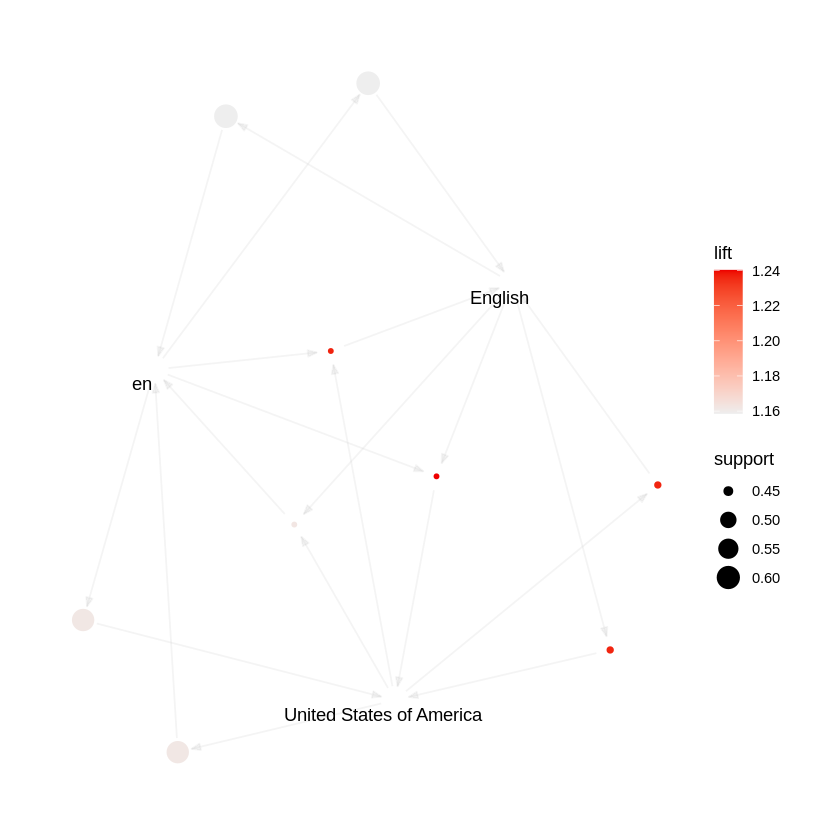

In [8]:
library(arulesViz)

plot(FrulesK, method = "graph", control = list(type = "items"))

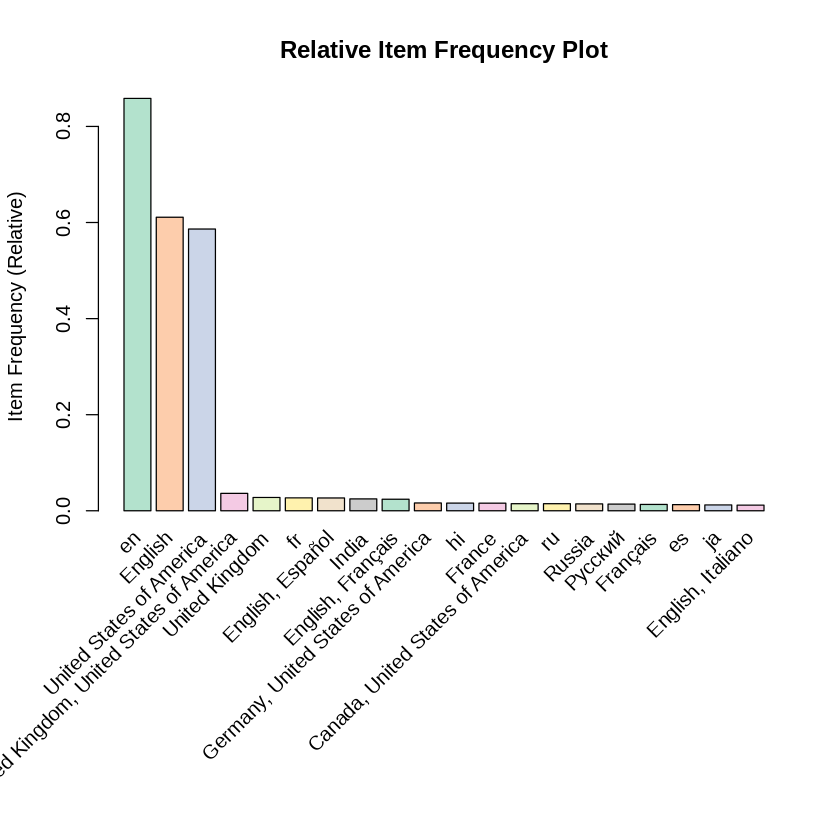

In [9]:
# Plot of which items are most frequent

arules::itemFrequencyPlot(dataTrans, topN = 20,
                          col = brewer.pal(8, 'Pastel2'),
                          main = 'Relative Item Frequency Plot',
                          type = "relative", #absolute
                          ylab = "Item Frequency (Relative)")

In [23]:
RulesByCofidence <- sort(FrulesK, by="confidence", decreasing=TRUE)
inspect(RulesByCofidence[1:9])

    lhs                                    rhs                        support  
[1] {English, United States of America} => {en}                       0.4419516
[2] {United States of America}          => {en}                       0.5848088
[3] {English}                           => {en}                       0.6076497
[4] {en, United States of America}      => {English}                  0.4419516
[5] {United States of America}          => {English}                  0.4430328
[6] {en, English}                       => {United States of America} 0.4419516
[7] {English}                           => {United States of America} 0.4430328
[8] {en}                                => {English}                  0.6076497
[9] {en}                                => {United States of America} 0.5848088
    confidence coverage  lift     count
[1] 0.9975595  0.4430328 1.162170 3270 
[2] 0.9972344  0.5864306 1.161791 4327 
[3] 0.9944702  0.6110285 1.158571 4496 
[4] 0.7557199  0.5848088 1.236800 3270 


In [24]:
RulesByLift <- sort(FrulesK, decreasing = TRUE, by = "lift")
inspect(RulesByLift[1:9])

    lhs                                    rhs                        support  
[1] {en, English}                       => {United States of America} 0.4419516
[2] {en, United States of America}      => {English}                  0.4419516
[3] {United States of America}          => {English}                  0.4430328
[4] {English}                           => {United States of America} 0.4430328
[5] {English, United States of America} => {en}                       0.4419516
[6] {United States of America}          => {en}                       0.5848088
[7] {en}                                => {United States of America} 0.5848088
[8] {English}                           => {en}                       0.6076497
[9] {en}                                => {English}                  0.6076497
    confidence coverage  lift     count
[1] 0.7273132  0.6076497 1.240237 3270 
[2] 0.7557199  0.5848088 1.236800 3270 
[3] 0.7554736  0.5864306 1.236397 3278 
[4] 0.7250608  0.6110285 1.236397 3278 


In [25]:
RulesBySupport <- sort(FrulesK, decreasing = TRUE, by = "support")
inspect(RulesBySupport[1:9])

    lhs                                    rhs                        support  
[1] {English}                           => {en}                       0.6076497
[2] {en}                                => {English}                  0.6076497
[3] {United States of America}          => {en}                       0.5848088
[4] {en}                                => {United States of America} 0.5848088
[5] {United States of America}          => {English}                  0.4430328
[6] {English}                           => {United States of America} 0.4430328
[7] {English, United States of America} => {en}                       0.4419516
[8] {en, United States of America}      => {English}                  0.4419516
[9] {en, English}                       => {United States of America} 0.4419516
    confidence coverage  lift     count
[1] 0.9944702  0.6110285 1.158571 4496 
[2] 0.7079200  0.8583592 1.158571 4496 
[3] 0.9972344  0.5864306 1.161791 4327 
[4] 0.6813100  0.8583592 1.161791 4327 
